In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
chunks = pd.read_csv(
    "data/US_Accidents.csv",
    chunksize=200_000,
    low_memory=False
)

df = pd.concat(chunks)


In [10]:
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

End_Lng              3402762
End_Lat              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Wind_Speed(mph)       571233
Visibility(mi)        177098
Wind_Direction        175206
Humidity(%)           174144
Weather_Condition     173459
Temperature(F)        163853
dtype: int64

In [11]:
cols = [
    'Severity',
    'Start_Time',
    'Weather_Condition',
    'Visibility(mi)',
    'Precipitation(in)',
    'State',
    'Traffic_Signal',
    'Junction'
]

df = df[cols]
df.head()


,Severity,Start_Time,Weather_Condition,Visibility(mi),Precipitation(in),State,Traffic_Signal,Junction
0,3,2016-02-08 05:46:00,Light Rain,10.0,0.02,OH,False,False
1,2,2016-02-08 06:07:59,Light Rain,10.0,0.00,OH,False,False
2,2,2016-02-08 06:49:27,Overcast,10.0,NaN,OH,True,False
3,3,2016-02-08 07:23:34,Mostly Cloudy,9.0,NaN,OH,False,False
4,2,2016-02-08 07:39:07,Mostly Cloudy,6.0,NaN,OH,True,False


# Feature Engineering (TIME-BASED FEATURES)

In [12]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

df['Hour'] = df['Start_Time'].dt.hour
df['Day'] = df['Start_Time'].dt.day_name()


In [13]:
df[['Start_Time', 'Hour', 'Day']].head()


,Start_Time,Hour,Day
0,2016-02-08 05:46:00,5.0,Monday
1,2016-02-08 06:07:59,6.0,Monday
2,2016-02-08 06:49:27,6.0,Monday
3,2016-02-08 07:23:34,7.0,Monday
4,2016-02-08 07:39:07,7.0,Monday


# Handle Missing Values

In [15]:
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].median())
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(0)
df['Weather_Condition'] = df['Weather_Condition'].fillna('Unknown')


In [16]:
df.isnull().sum()


Severity                  0
Start_Time           743166
Weather_Condition         0
Visibility(mi)            0
Precipitation(in)         0
State                     0
Traffic_Signal            0
Junction                  0
Hour                 743166
Day                  743166
dtype: int64

# Accident Severity Distribution

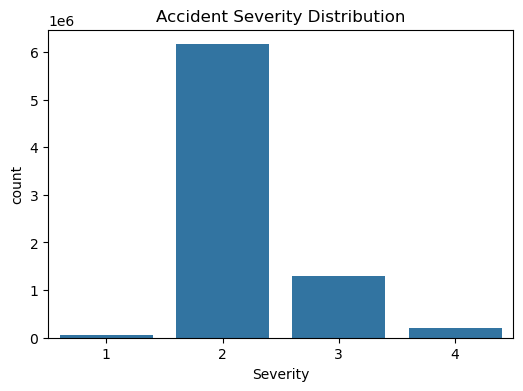

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Severity', data=df)
plt.title("Accident Severity Distribution")
plt.show()


# Accidents by Hour of Day

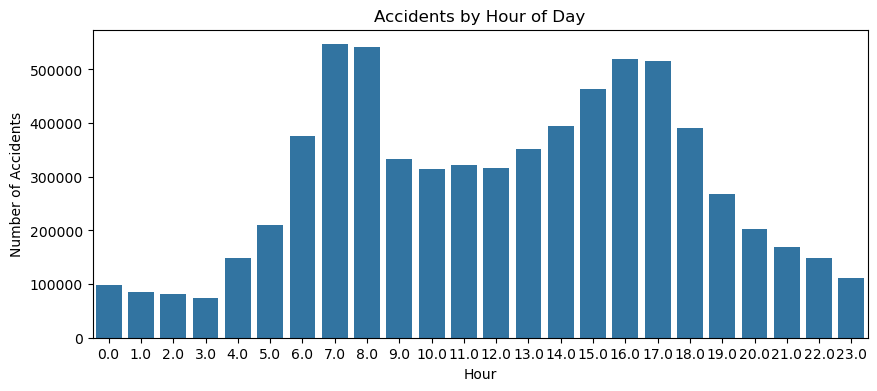

In [18]:
plt.figure(figsize=(10,4))
sns.countplot(x='Hour', data=df)
plt.title("Accidents by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Accidents")
plt.show()


# Accidents by Day of Week

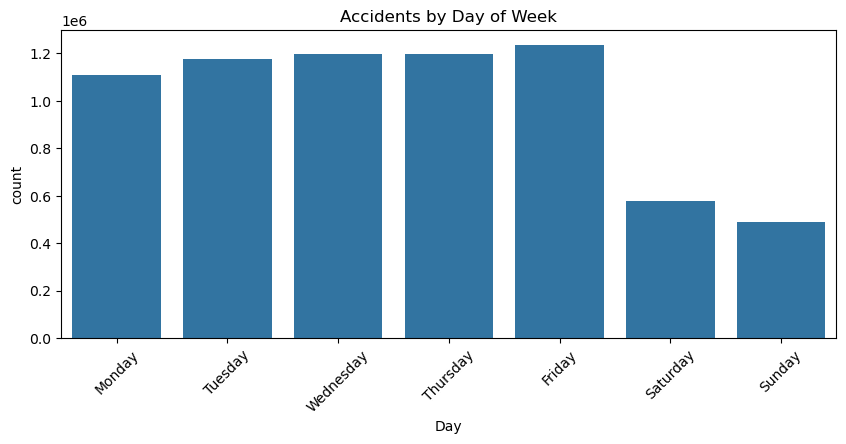

In [19]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(10,4))
sns.countplot(x='Day', data=df, order=order)
plt.title("Accidents by Day of Week")
plt.xticks(rotation=45)
plt.show()


# Weather Conditions During Accidents

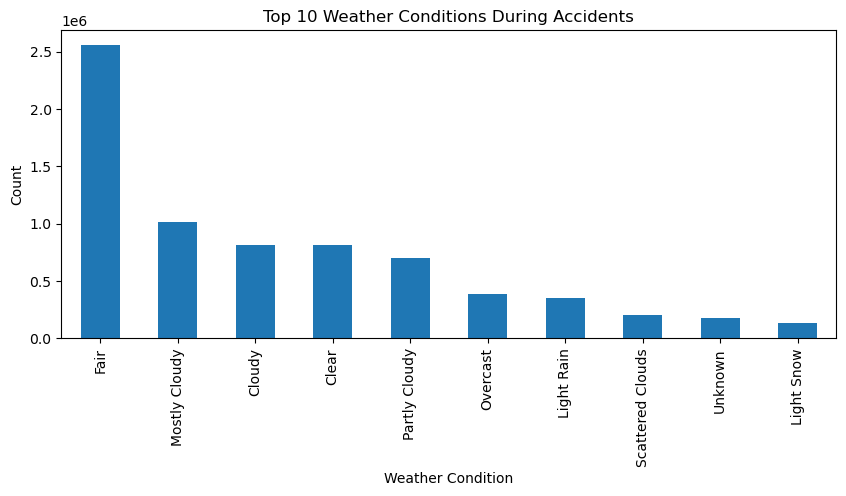

In [20]:
top_weather = df['Weather_Condition'].value_counts().head(10)

plt.figure(figsize=(10,4))
top_weather.plot(kind='bar')
plt.title("Top 10 Weather Conditions During Accidents")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()


# Visibility vs Accident Severity

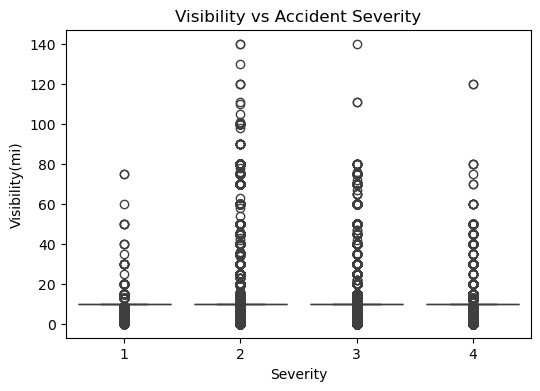

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Severity', y='Visibility(mi)', data=df)
plt.title("Visibility vs Accident Severity")
plt.show()


# Traffic Signals & Junctions

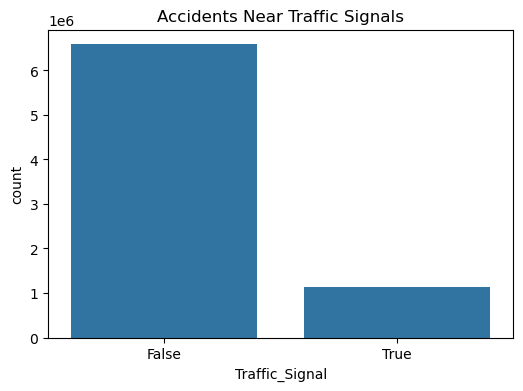

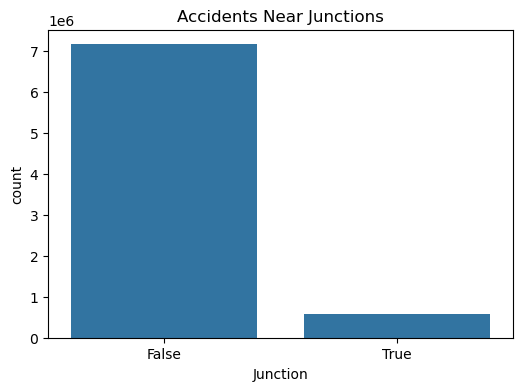

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Traffic_Signal', data=df)
plt.title("Accidents Near Traffic Signals")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Junction', data=df)
plt.title("Accidents Near Junctions")
plt.show()
